  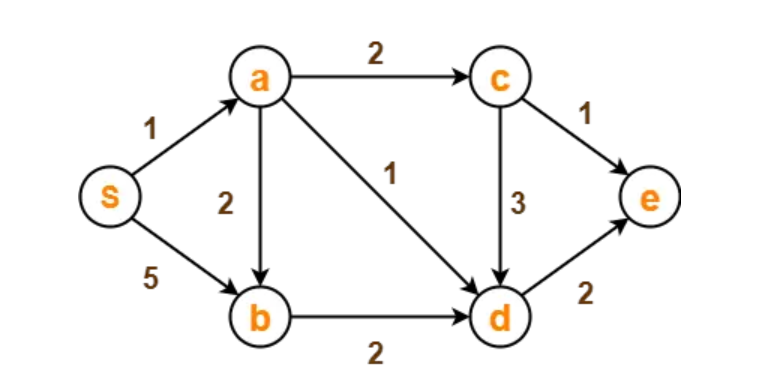
  

## Using Dijkstra’s Algorithm, find the shortest distance from source vertex ‘S’ to the remaining vertices in the given graph

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    table {
      border-collapse: collapse;
      margin-top: 20px;
    }

    table, th, td {
      border: 1px solid black;
    }

    th, td {
      padding: 10px;
      text-align: center;
    }
  </style>
</head>
<body>

  <h2>Adjacency Matrix</h2>

  <table>
    <thead>
      <tr>
        <th></th>
        <th>s</th>
        <th>a</th>
        <th>b</th>
        <th>c</th>
        <th>d</th>
        <th>e</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>s</th>
        <td>0</td>
        <td>1</td>
        <td>5</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
      </tr>
      <tr>
        <th>a</th>
        <td>0</td>
        <td>0</td>
        <td>2</td>
        <td>2</td>
        <td>1</td>
        <td>0</td>
      </tr>
      <tr>
        <th>b</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>2</td>
        <td>0</td>
      </tr>
      <tr>
        <th>c</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>3</td>
        <td>1</td>
      </tr>
      <tr>
        <th>d</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>2</td>
      </tr>
      <tr>
        <th>e</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
      </tr>
    </tbody>


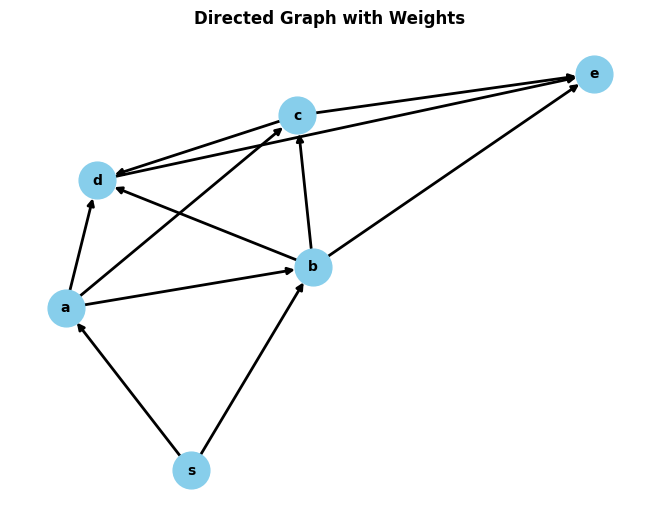

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    's': {'a': 1, 'b': 5},
    'a': {'b': 2, 'c': 2, 'd': 1},
    'b': {'c': 2, 'd': 1, 'e': 2},
    'c': {'d': 3, 'e': 1},
    'd': {'e': 2},
    'e': {}
}

G = nx.DiGraph(graph)
pos = nx.spring_layout(G)

# Draw nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', width=2.0)

# Draw edge labels with weights
edge_labels = {(u, v): d for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph with Weights", fontweight='bold')
plt.show()


In [ ]:
import numpy as np
nodes = input("Enter the nodes : ").split()
# nodes = ['s', 'a', 'b', 'c', 'd', 'e']
n = len(nodes)
# print("\ninput each rows of adjacency matrix")
# graph = np.array([[int(x) for x in input("Enter row: ").split()]for i in range(n)])
graph = np.array([
    [0,1,5,0,0,0],
    [0,0,2,2,1,0],
    [0,0,0,0,2,0],
    [0,0,0,0,3,1],
    [0,0,0,0,0,2],
    [0,0,0,0,0,0]
])
print()
print(graph)
print()
start = input("start node: ")
# start = 's'

def Nsort(a):
    l = []
    for i in sorted(a):
        for j in range(n):
            if a[j] == i and (j not in l):
                l.append(j)
    return l


def min_distance(distances,index):
    for i in range(n):
        if graph[index,i] != 0:
          distance = distances[index] + graph[index,i]
          if distance < distances[i]:
            distances[i] = distance


def dijkstra(graph, start):
    distances = [float('inf')] * n

    index = nodes.index(start)
    distances[index] = 0
    print()
    print(start,distances)

    mark = nodes.copy()
    mark.remove(start)

    while len(mark) != 0:
      min_distance(distances,index)
      index = Nsort(distances)[n-len(mark)]

      print(nodes[index],distances)
      mark.remove(nodes[index])
    return distances

d = dijkstra(graph, start)

print("\nShortest distances:")
for i in range(n):
  print(f"({start}, {nodes[i]})->{d[i]}")

Enter the nodes : s a b c d e

[[0 1 5 0 0 0]
 [0 0 2 2 1 0]
 [0 0 0 0 2 0]
 [0 0 0 0 3 1]
 [0 0 0 0 0 2]
 [0 0 0 0 0 0]]

start node: s

s [0, inf, inf, inf, inf, inf]
a [0, 1, 5, inf, inf, inf]
d [0, 1, 3, 3, 2, inf]
b [0, 1, 3, 3, 2, 4]
c [0, 1, 3, 3, 2, 4]
e [0, 1, 3, 3, 2, 4]

Shortest distances:
(s, s)->0
(s, a)->1
(s, b)->3
(s, c)->3
(s, d)->2
(s, e)->4


In [ ]:
import numpy as np
from pprint import pprint

def min_distance(distances, visited):
    min_dist = float('inf')
    min_index = -1
    for i in distances:
        if distances[i] < min_dist and not visited[i]:
            min_dist = distances[i]
            min_index = i
    return min_index

def dijkstra(graph, nodes, start):
    n = len(graph)
    distances = {node: float('inf') for node in nodes}
    visited = {node: False for node in nodes}
    distances[start] = 0

    for i in range(n):
        c = min_distance(distances, visited)
        visited[c] = True

        for j in graph[c]:
            if not visited[j]:
                distance = distances[c] + graph[c][j]
                if distance < distances[j]:
                    distances[j] = distance

    return distances

nodes = input("Enter the nodes: ").split()

graph = {
    's': {'a': 1, 'b': 5},
    'a': {'b': 2, 'c': 2, 'd': 1},
    'b': {'c': 2, 'd': 1, 'e': 2},
    'c': {'d': 3, 'e': 1},
    'd': {'e': 2},
    'e': {}
}

print()
pprint(graph)
print()
start = input("Start node: ")

r = dijkstra(graph, nodes, start)

print("\nShortest distances:")
for node in nodes:
    print(f"({start},{node}) -> {r[node]}")




Enter the nodes: s a b c d e

{'a': {'b': 2, 'c': 2, 'd': 1},
 'b': {'c': 2, 'd': 1, 'e': 2},
 'c': {'d': 3, 'e': 1},
 'd': {'e': 2},
 'e': {},
 's': {'a': 1, 'b': 5}}

Start node: s

Shortest distances:
(s, s) -> 0
(s, a) -> 1
(s, b) -> 3
(s, c) -> 3
(s, d) -> 2
(s, e) -> 4
